In [1]:
import pandas as pd
#Specify the file name
file_name="Car sales.csv"
#Load CSV file
df=pd.read_csv(file_name)
print(df.head())
print(df.tail())
#Get the shape
print(df.shape)
#Describe the numerical columns
print(df.describe())
#Display column headers with data types
print(df.columns)
print(df.dtypes)
df.to_csv("Car sales.csv",index=False)


         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  01-02-22     Geraldine   Male          13500   
1  C_CND_000002  01-02-22           Gia   Male        1480000   
2  C_CND_000003  01-02-22        Gianna   Male        1035000   
3  C_CND_000004  01-02-22       Giselle   Male          13500   
4  C_CND_000005  01-02-22         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  01-02-22     Geraldine   Male          13500   
1  C_CND_000002  01-02-22           Gia   Male        1480000   
2  C_CND_000003  01-02-22        Gianna   Male        1035000   
3  C_CND_000004  01-02-22       Giselle   Male          13500   
4  C_CND_000005  01-02-22         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

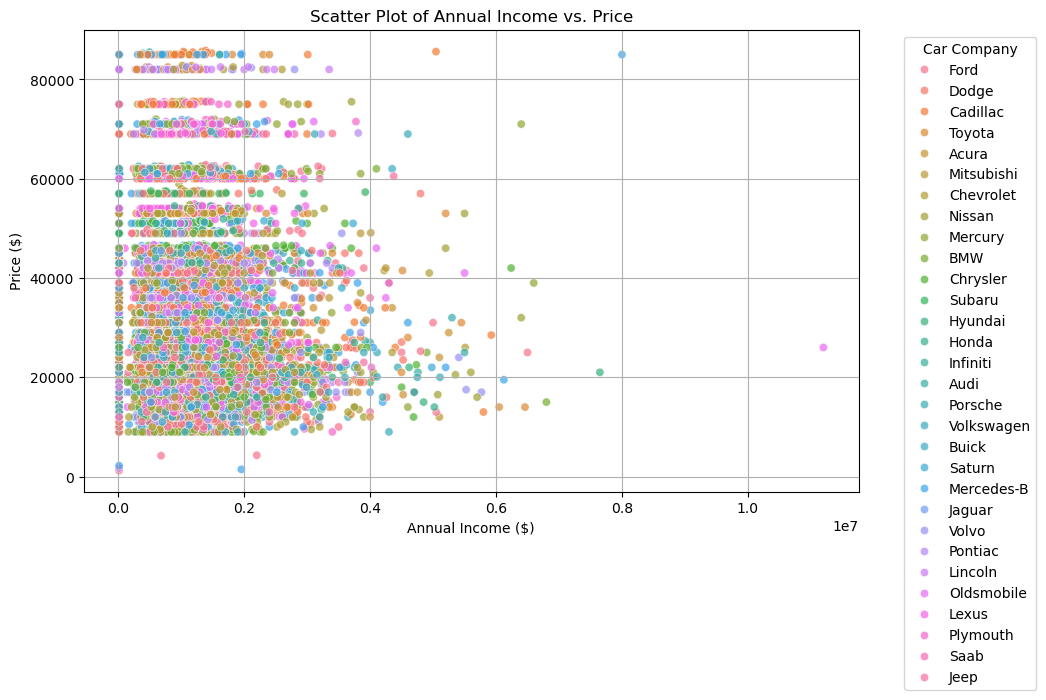

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('Car sales.csv')

# Display the first few rows of the dataframe
print(df.head())

# Data cleaning (if necessary)
# For example, converting 'Price ($)' and 'Annual Income' to numeric
df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')
df['Annual Income'] = pd.to_numeric(df['Annual Income'], errors='coerce')

# Drop rows with missing values in these columns
df = df.dropna(subset=['Price ($)', 'Annual Income'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income', y='Price ($)', hue='Company', alpha=0.7)
plt.title('Scatter Plot of Annual Income vs. Price')
plt.xlabel('Annual Income ($)')
plt.ylabel('Price ($)')
plt.legend(title='Car Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

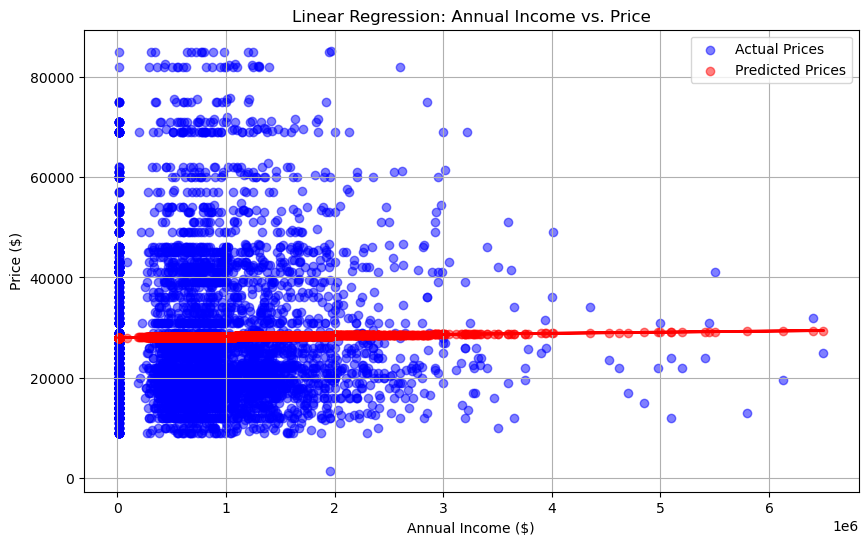

Coefficient: 0.0002198297369248169
Intercept: 27976.43991194325


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('Car sales.csv')

# Data cleaning
df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')
df['Annual Income'] = pd.to_numeric(df['Annual Income'], errors='coerce')
df = df.dropna(subset=['Price ($)', 'Annual Income'])

# Define features and target variable
X = df[['Annual Income']]
y = df['Price ($)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices', alpha=0.5)
plt.scatter(X_test, y_pred, color='red', label='Predicted Prices', alpha=0.5)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Linear Regression: Annual Income vs. Price')
plt.xlabel('Annual Income ($)')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()

# Display model coefficients
print(f'Coefficient: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')

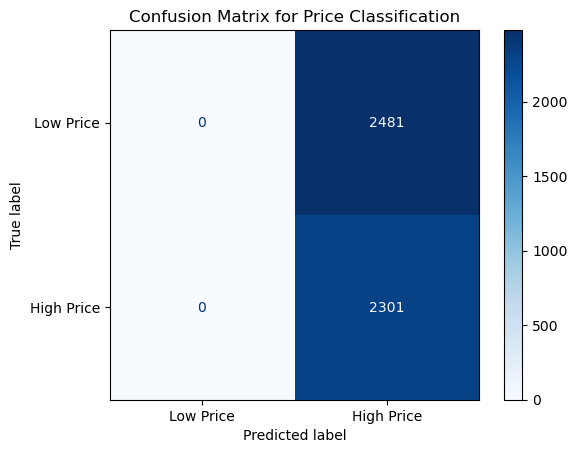

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the data
df = pd.read_csv('Car sales.csv')

# Data cleaning
df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')
df['Annual Income'] = pd.to_numeric(df['Annual Income'], errors='coerce')
df = df.dropna(subset=['Price ($)', 'Annual Income'])

# Create a binary target variable: 1 if Price > median, else 0
median_price = df['Price ($)'].median()
df['High Price'] = (df['Price ($)'] > median_price).astype(int)

# Define features and target variable
X = df[['Annual Income']]
y = df['High Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression classifier
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low Price", "High Price"])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Price Classification')
plt.show()

Accuracy: 0.48
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2481
           1       0.48      1.00      0.65      2301

    accuracy                           0.48      4782
   macro avg       0.24      0.50      0.32      4782
weighted avg       0.23      0.48      0.31      4782



C:\Users\l\anaconda3\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\l\anaconda3\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\l\anaconda3\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


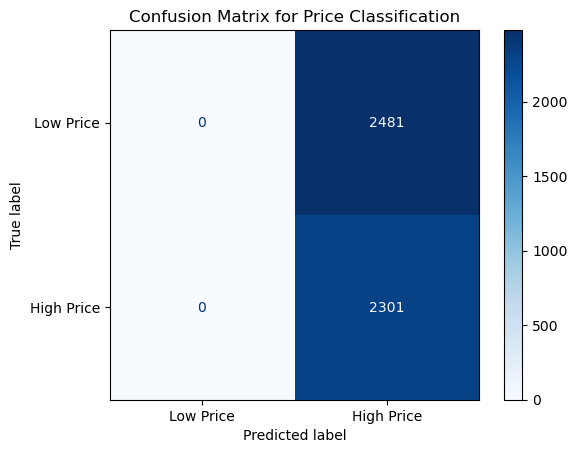

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# Load the data
df = pd.read_csv('Car sales.csv')

# Data cleaning
df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')
df['Annual Income'] = pd.to_numeric(df['Annual Income'], errors='coerce')
df = df.dropna(subset=['Price ($)', 'Annual Income'])

# Create a binary target variable: 1 if Price > median, else 0
median_price = df['Price ($)'].median()
df['High Price'] = (df['Price ($)'] > median_price).astype(int)

# Define features and target variable
X = df[['Annual Income']]  # You can add more features if needed
y = df['High Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression classifier
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low Price", "High Price"])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Price Classification')
plt.show()

In [19]:
pip install pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


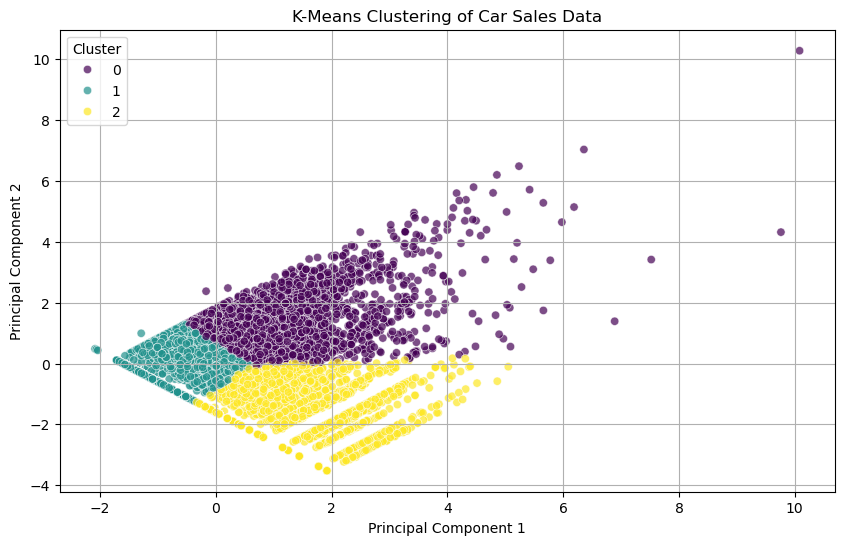

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the data
df = pd.read_csv('Car sales.csv')

# Data cleaning
df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')
df['Annual Income'] = pd.to_numeric(df['Annual Income'], errors='coerce')
df = df.dropna(subset=['Price ($)', 'Annual Income'])

# Select features for clustering
X = df[['Annual Income', 'Price ($)']]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can change the number of clusters
kmeans.fit(X_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Visualize the clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis', alpha=0.7)
plt.title('K-Means Clustering of Car Sales Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

In [23]:
pip install pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.52      0.61      0.56      2481
           1       0.48      0.40      0.44      2301

    accuracy                           0.51      4782
   macro avg       0.50      0.50      0.50      4782
weighted avg       0.50      0.51      0.50      4782



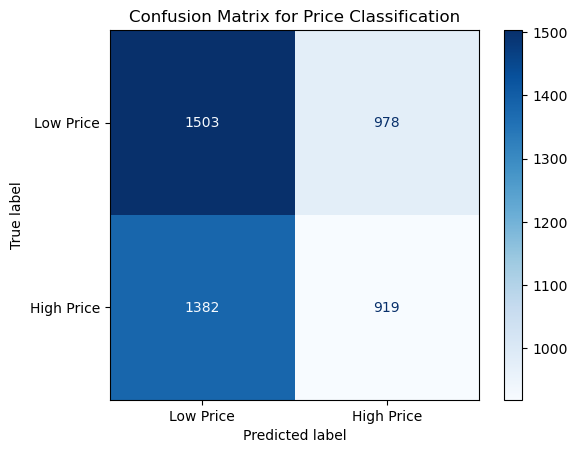

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# Load the data
df = pd.read_csv('Car sales.csv')

# Data cleaning
df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')
df['Annual Income'] = pd.to_numeric(df['Annual Income'], errors='coerce')
df = df.dropna(subset=['Price ($)', 'Annual Income'])

# Create a binary target variable: 1 if Price > median, else 0
median_price = df['Price ($)'].median()
df['High Price'] = (df['Price ($)'] > median_price).astype(int)

# Define features and target variable
X = df[['Annual Income']]  # You can add more features if needed
y = df['High Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low Price", "High Price"])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Price Classification')
plt.show()